## Initial FrED Statistical Exploration 1

Exploration of basic statistics on initial FrED data.

Uses data - "Run_Comparison_1.csv"

J. Cuiffi - Penn State New Kensington, Data from MIT - B. Anthony, D. Kim

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
# import data - no path - data should be in same folder as notebook
data1 = pd.read_csv('Run_Comparison_1.csv')
data1

,Time (s),Run A Diameter (mm),Run B Diameter (mm)
0,0.0,0.395941,0.382270
1,0.1,0.395941,0.382270
2,0.2,0.395941,0.382270
3,0.3,0.395941,0.382270
4,0.4,0.395941,0.382270
...,...,...,...
995,99.5,0.368600,0.341259
996,99.6,0.368600,0.327588
997,99.7,0.368600,0.327588
998,99.8,0.368600,0.341259


(0, 0.6)

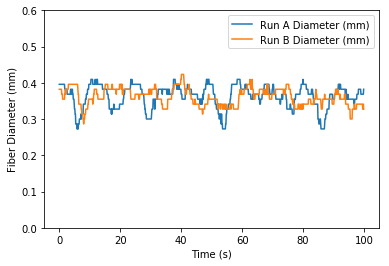

In [59]:
# plot data
# display options
%matplotlib inline
#%matplotlib notebook
plt.plot(data1['Time (s)'], data1['Run A Diameter (mm)'])
plt.plot(data1['Time (s)'], data1['Run B Diameter (mm)'])
plt.xlabel('Time (s)')
plt.ylabel('Fiber Diameter (mm)')
plt.legend()
plt.ylim(0,.6)

In [60]:
# add rolling averages
data1['Run A Rolling Ave'] = data1['Run A Diameter (mm)'].rolling(window=10).mean()
data1['Run B Rolling Ave'] = data1['Run B Diameter (mm)'].rolling(window=10).mean()
data1

,Time (s),Run A Diameter (mm),Run B Diameter (mm),Run A Rolling Ave,Run B Rolling Ave
0,0.0,0.395941,0.382270,NaN,NaN
1,0.1,0.395941,0.382270,NaN,NaN
2,0.2,0.395941,0.382270,NaN,NaN
3,0.3,0.395941,0.382270,NaN,NaN
4,0.4,0.395941,0.382270,NaN,NaN
...,...,...,...,...,...
995,99.5,0.368600,0.341259,0.374068,0.341259
996,99.6,0.368600,0.327588,0.372701,0.339892
997,99.7,0.368600,0.327588,0.371334,0.338525
998,99.8,0.368600,0.341259,0.369967,0.338525


(0, 0.6)

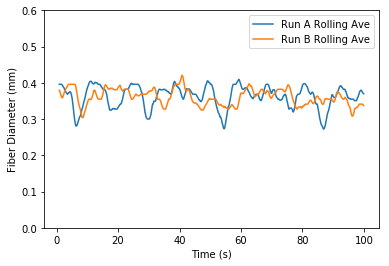

In [61]:
# plot rolling averages
plt.plot(data1['Time (s)'], data1['Run A Rolling Ave'])
plt.plot(data1['Time (s)'], data1['Run B Rolling Ave'])
plt.xlabel('Time (s)')
plt.ylabel('Fiber Diameter (mm)')
plt.legend()
plt.ylim(0,.6)

In [62]:
# basic statistics
print('Run A Mean:', data1['Run A Diameter (mm)'].mean())
print('Run A Std Dev:', data1['Run A Diameter (mm)'].std())
print('Run B Mean:', data1['Run B Diameter (mm)'].mean())
print('Run B Std Dev:', data1['Run B Diameter (mm)'].std())

Run A Mean: 0.36265313700000157
Run A Std Dev: 0.03198784886968082
Run B Mean: 0.3609715840000002
Run B Std Dev: 0.023382381495933205


Run A Histogram
[0.272907   0.28267157 0.29243614 0.30220071 0.31196529 0.32172986
 0.33149443 0.341259   0.35102357 0.36078814 0.37055271 0.38031729
 0.39008186 0.39984643 0.409611  ]


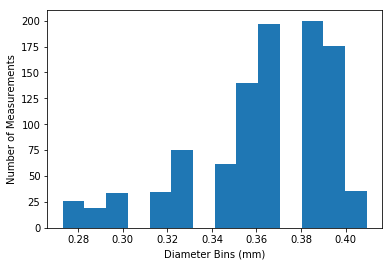

In [63]:
# histogram - A
n, bins, patches = plt.hist(data1['Run A Diameter (mm)'],14)
plt.xlabel('Diameter Bins (mm)')
plt.ylabel('Number of Measurements')
print('Run A Histogram')
print(bins)

Run B Histogram


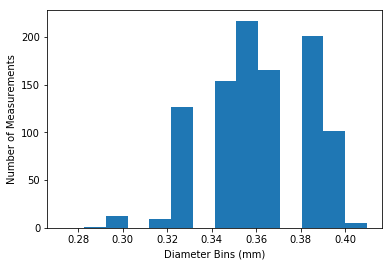

In [64]:
# histogram - B
plt.hist(data1['Run B Diameter (mm)'],bins)
plt.xlabel('Diameter Bins (mm)')
plt.ylabel('Number of Measurements')
print('Run B Histogram')

In [65]:
# import FFT module
from scipy import fftpack

Fiber Diameter Signal Analysis


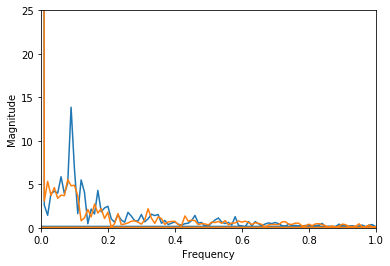

In [66]:
# Frequency analysis
# sampling rate #/s
f_sample = 10
magnitudesA = fftpack.fft(data1['Run A Diameter (mm)'])
magnitudesB = fftpack.fft(data1['Run B Diameter (mm)'])
freqs = fftpack.fftfreq(len(data1['Run A Diameter (mm)'])) * f_sample
plt.plot(freqs, np.abs(magnitudesA))
plt.plot(freqs, np.abs(magnitudesB))
plt.xlim(0,1)
plt.ylim(0,25)
plt.ylabel('Magnitude')
plt.xlabel('Frequency')
print('Fiber Diameter Signal Analysis')